<a href="https://colab.research.google.com/github/sumitha9020/Elevatelabs_Tasks/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

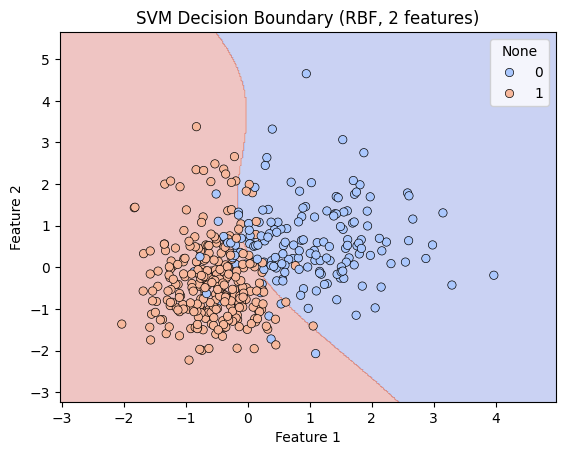

In [2]:
# Task 7: Support Vector Machines (SVM) Classification

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. Load dataset
df = pd.read_csv("/content/breast-cancer.csv")
print(df.head())

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign

print("Dataset shape:", X.shape)
print("Classes:", np.unique(y))

# 2. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train SVM with Linear Kernel
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report (Linear):\n", classification_report(y_test, y_pred_linear))

# 5. Train SVM with RBF Kernel
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

# 6. Hyperparameter Tuning with GridSearchCV
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters (RBF):", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# 7. Cross-validation with linear kernel
cv_scores = cross_val_score(SVC(kernel="linear", C=1), X_scaled, y, cv=5)
print("Cross-validation Accuracy (Linear):", cv_scores.mean())

# 8. Simple 2D Decision Boundary Visualization (using first 2 features)
def plot_decision_boundary(X, y, model, title):
    X = X[:, :2]  # take first 2 features
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Train a 2D model for visualization
svm_vis = SVC(kernel="rbf", C=1, gamma=0.1)
svm_vis.fit(X_train[:, :2], y_train)
plot_decision_boundary(X_train, y_train, svm_vis, "SVM Decision Boundary (RBF, 2 features)")
